In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from utils import CaptchaDataset, plot_sample, decode_from_output, compute_loss, accuracy
from crnn import CRNN

In [2]:
batch_size = 64
lr = 0.003
epochs = 1000

train_dataset = CaptchaDataset('../data/train')
val_dataset = CaptchaDataset('../data/test')
test_dataset = CaptchaDataset('../data/original')


train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
a, b, c = test_dataset[11]

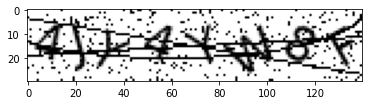

'4JY4YW8F'

In [4]:
plot_sample(a)
b

In [5]:
a.shape

torch.Size([30, 140])

In [6]:
def weights_init(m):
    classname = m.__class__.__name__
    
    if classname.find('Conv') != -1:
        m.weight.data.normal_(0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        m.weight.data.normal_(1.0, 0.02)
        m.bias.data.fill_(0)

In [7]:
model = CRNN(30, 140, 36*8, 1).to(device)
model.apply(weights_init)

CRNN(
  (conv1): Conv2d(1, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (batchnorm1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (batchnorm2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (batchnorm3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (batchnorm4): BatchNorm2d(64, ep

In [8]:
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [9]:
for epoch in range(1, 2+1):
    
    # train
    model.train()
    loss_train = 0
    correct = 0
    for images, labels, targets in train_loader:
        images = images.to(device)
        images = images.unsqueeze(1)
        targets = targets.to(device)
        
        output = model(images)
        
        loss = compute_loss(targets, output)
        print(loss.item())
        correct += accuracy(output, targets)
        
        loss_train += loss.item()
        #print(loss_train)

1.2107269763946533
1.1972308158874512
1.2168560028076172
1.1898069381713867
1.2694262266159058
1.1794037818908691
1.207397222518921
1.2162995338439941
1.1595020294189453
1.2153652906417847
1.1633520126342773
1.19474196434021
1.2928683757781982
1.1942496299743652
1.206737995147705
1.2399190664291382
1.2368031740188599
1.164600133895874
1.224758267402649
1.2213966846466064
1.1735730171203613
1.2052710056304932
1.2134116888046265
1.2249789237976074
1.1964001655578613
1.22585928440094
1.205313801765442
1.3371691703796387
1.205604910850525
1.2055860757827759
1.1617400646209717
1.2375661134719849
1.190004825592041
1.3000173568725586
1.2088024616241455
1.164388656616211
1.2228676080703735
1.2179802656173706
1.2719837427139282
1.2382365465164185
1.255560040473938
1.2003179788589478
1.2426546812057495
1.2725231647491455
1.2370904684066772
1.2143629789352417
1.23228120803833
1.1929175853729248
1.1373571157455444
1.232900619506836
1.2604964971542358
1.2389795780181885
1.2191994190216064
1.1807351

1.200242280960083
1.1762878894805908
1.1581496000289917
1.2110447883605957
1.2644402980804443
1.1395748853683472
1.2451601028442383
1.1333626508712769
1.2053316831588745
1.177724838256836
1.251232624053955
1.1530522108078003
1.244907259941101
1.2518351078033447
1.246354103088379
1.2597054243087769
1.2662452459335327
1.1701557636260986
1.2323676347732544
1.1534435749053955
1.2210837602615356
1.2098721265792847
1.2258917093276978
1.148376226425171
1.2733790874481201
1.252659797668457
1.2037347555160522
1.156636357307434
1.2095599174499512
1.274073839187622
1.232041597366333
1.2392643690109253
1.2170082330703735
1.2981510162353516
1.2490867376327515
1.2417322397232056
1.2554516792297363
1.2389683723449707
1.1187071800231934
1.2016847133636475
1.225958228111267
1.2587486505508423
1.2522664070129395
1.1595839262008667
1.2314229011535645
1.222678780555725
1.1212178468704224
1.1261018514633179
1.1971381902694702
1.2166969776153564
1.2413971424102783
1.2535895109176636
1.201112985610962
1.2480

1.2589342594146729
1.2607574462890625
1.1881989240646362
1.1996102333068848
1.2320616245269775
1.239193081855774
1.1929787397384644
1.2537294626235962
1.1811186075210571
1.2706406116485596
1.1815754175186157
1.2655689716339111
1.1947381496429443
1.2217202186584473
1.2414337396621704
1.255826473236084
1.2374321222305298
1.2186393737792969
1.2109689712524414
1.2095140218734741
1.1475132703781128
1.1662166118621826
1.2090210914611816
1.169456958770752
1.1994951963424683
1.2367039918899536
1.2522332668304443
1.2707297801971436
1.2235897779464722
1.2814886569976807
1.2184101343154907
1.2940819263458252
1.204298496246338
1.2415741682052612
1.1552079916000366
1.1982746124267578
1.2620080709457397
1.2072782516479492
1.300004243850708
1.2200140953063965
1.1709771156311035
1.232688546180725
1.263943076133728
1.2502646446228027
1.221435785293579
1.20574951171875
1.2322437763214111
1.2296974658966064
1.2168645858764648
1.2755526304244995
1.2618637084960938
1.15526282787323
1.1905829906463623
1.267

1.1891392469406128
1.2309329509735107
1.2075896263122559
1.2752032279968262
1.3247034549713135
1.16697359085083
1.2464715242385864
1.2458369731903076
1.1651549339294434
1.2117938995361328
1.2515273094177246
1.1912118196487427
1.165543556213379
1.211820125579834
1.2504440546035767
1.269573450088501
1.2709343433380127
1.2420552968978882
1.2428330183029175
1.2226552963256836
1.2873471975326538
1.1918025016784668
1.2352750301361084
1.216315746307373
1.2313405275344849
1.1476677656173706
1.192581295967102
1.188037633895874
1.2827118635177612
1.2333359718322754
1.167693018913269
1.2247251272201538
1.2123147249221802
1.1945264339447021
1.2343720197677612
1.1766191720962524
1.2304729223251343
1.2608048915863037
1.254361867904663
1.2383931875228882
1.2440218925476074
1.2174080610275269
1.2239106893539429
1.227628231048584
1.1887850761413574
1.2296007871627808
1.225426435470581
1.206021785736084
1.2020263671875
1.2292706966400146
1.2183282375335693
1.2125941514968872
1.1855489015579224
1.2399059

KeyboardInterrupt: 

In [10]:
correct

0

In [11]:
output

tensor([[0.0000, 0.2935, 0.0000,  ..., 1.4364, 0.2595, 1.2129],
        [0.0000, 0.5733, 0.0000,  ..., 1.0203, 0.4127, 0.0000],
        [0.0000, 0.5961, 0.5305,  ..., 1.7703, 0.0000, 0.5012],
        ...,
        [0.0000, 0.3422, 0.4354,  ..., 1.1784, 0.0000, 0.0123],
        [0.0000, 0.3203, 0.0000,  ..., 1.1689, 0.1270, 0.3149],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.4984, 0.1404]],
       device='cuda:0', grad_fn=<FusedDropoutBackward>)